<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
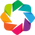

In [1]:
from codebase.plot import *
import pandas as pd
import numpy as np
from scipy.stats import norm, multivariate_normal, invwishart, invgamma
from codebase.pseudogibbs import mcmc


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
np.random.seed(341)
nsim_data = 1000
J = 5
K = 2
ww = np.array([[1,0], [-2, 2],[-1,-1],[2,1], [3,-1]], dtype=float)
sigma = np.array([1,2,.3,.8, 1])
Sigma = np.diag(sigma)
ee = multivariate_normal.rvs(mean = np.zeros(J), cov = Sigma, size=nsim_data)
zz = multivariate_normal.rvs(mean = np.zeros(K), cov=np.eye(K), size=nsim_data)
yy = zz@ww.T + ee

err = np.abs((ww@ww.T + Sigma) - np.cov(yy.T))

# errors = np.empty((100, err.shape[0],err.shape[1]))
# for kk in range(100):
#     zz = multivariate_normal.rvs(mean = np.zeros(K), cov=np.eye(K), size=nsim_data)
#     ee = multivariate_normal.rvs(mean = np.zeros(J), cov = Sigma, size=nsim_data)
#     yy = zz@ww.T + ee
#     errors[kk] = (ww@ww.T + Sigma) - np.cov(yy.T)

# np.mean(errors, axis=0)    

In [3]:
data = dict()
data['N'] = nsim_data
data['K'] = K
data['J'] = J
data['sigma'] = sigma
data['Sigma'] = Sigma
data['y'] = yy
data['z'] = zz
data['w'] = ww
data['e'] = ee
data['obs_cov'] = np.cov(data['y'].T)

In [4]:
print("dim(w) = ", ww.shape)
print("dim(z) = ", zz.shape)
print("dim(y) = ", yy.shape)
print("dim(e) = ", ee.shape)


dim(w) =  (5, 2)
dim(z) =  (1000, 2)
dim(y) =  (1000, 5)
dim(e) =  (1000, 5)


In [5]:
ps = mcmc(data, nsim=1000, nsim_z=500)

[==========] 900 steps

In [6]:
def construct_params(ps):
    nsim = ps['sigma'].shape[0]
    J = ps['sigma'].shape[1]
    a = np.empty((nsim, J, J))
    for i in range(nsim):
        a[i] = ps['w'][i]@ps['w'][i].T + \
            np.diag(ps['sigma'][i])

    return a
        
    
obs_cov = construct_params(ps)
ps['obs_cov'] = obs_cov

In [7]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(data['J']):
    for j in range(data['J']):
        if i==0 and j==1:
            pass
        else:
            plots.append(plot_trace(ps['obs_cov'][:,i,j],
                     true_value=data['obs_cov'][i,j],
                     title = 'Posterior distribution for Omega(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_0_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_1_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_2_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_3_comma_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_Omega_left_parenthesis_4_comma_2_right_parenthesis :Overlay
      .C

In [8]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 

plots = []
for i in range(data['J']):
    plots.append(plot_trace(ps['sigma'][:,i],
             true_value=data['sigma'][i],
             title = 'Posterior distribution for sigma(%s)'%(i)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_2_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_3_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_sigma_left_parenthesis_4_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

In [9]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(data['J']):
    for j in range(data['K']):
        if i==0 and j==1:
            pass
        else:
            plots.append(plot_trace(ps['w'][:,i,j],
                     true_value=data['w'][i,j],
                     title = 'Posterior distribution for w(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_w_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_4_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_w_left_parenthesis_4_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)

In [10]:
%%opts Curve {+axiswise} [width=600, height=200, tools=['hover']] 
plots = []
for i in range(4):
    for j in range(0,data['K']):
            plots.append(plot_trace(ps['z'][:,i,j],
                     true_value=data['z'][i,j],
                     title = 'Posterior distribution for z(%s,%s)'%(i,j)))
layout = hv.Layout(plots)
layout.cols(1)

:Layout
   .Overlay.Posterior_distribution_for_z_left_parenthesis_0_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_0_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_1_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_1_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_2_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_2_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_3_comma_0_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)
   .Overlay.Posterior_distribution_for_z_left_parenthesis_3_comma_1_right_parenthesis :Overlay
      .Curve.Samples    :Curve   [x]   (y)
      .Curve.True_Value :Curve   [x]   (y)